In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot, plot
from empath import Empath

In [3]:
df = pd.read_csv("data/Features_For_Traditional_ML_Techniques.csv")
df

,Unnamed: 0,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,0,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,0,5,0,1,0,33,3,5,19
1,1,True,End of eviction moratorium means millions of A...,1.0,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,...,0,2,1,0,0,0,14,0,2,34
2,2,True,End of eviction moratorium means millions of A...,1.0,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,...,0,1,0,0,0,0,3,0,4,10
3,3,True,End of eviction moratorium means millions of A...,1.0,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,...,0,1,3,0,0,1,6,8,1,30
4,4,True,End of eviction moratorium means millions of A...,1.0,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,...,0,1,3,0,1,0,11,3,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134193,134193,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,...,0,2,1,0,3,0,31,0,4,32
134194,134194,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,...,0,0,1,0,0,0,16,6,2,8
134195,134195,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,...,1,4,1,0,0,1,2,4,0,37
134196,134196,False,Joe Bidens great-grandfather Joseph J. Biden w...,0.0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,...,1,0,3,0,0,0,0,0,1,11


In [4]:
df.describe()

,Unnamed: 0,BinaryNumTarget,followers_count,friends_count,favourites_count,statuses_count,listed_count,following,BotScore,BotScoreBinary,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
count,134198.00000,134198.000000,1.341980e+05,134198.000000,1.341980e+05,1.341980e+05,134198.000000,134198.0,134198.000000,134198.000000,...,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000,134198.000000
mean,67098.50000,0.513644,1.129308e+04,1893.454455,3.298123e+04,3.419576e+04,73.300198,0.0,0.059106,0.032355,...,0.135583,1.003495,2.366116,0.259408,0.307151,0.121537,12.831905,3.559494,2.249557,21.438658
std,38739.77005,0.499816,4.374971e+05,6997.695671,6.878021e+04,7.510120e+04,1083.274277,0.0,0.167819,0.176942,...,0.379235,1.086844,2.140459,0.903957,0.774367,0.453865,15.557524,6.674458,2.912136,9.625147
min,0.00000,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33549.25000,0.000000,7.000000e+01,168.000000,1.356000e+03,3.046000e+03,0.000000,0.0,0.030000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,1.000000,14.000000
50%,67098.50000,1.000000,3.540000e+02,567.000000,8.377000e+03,1.101900e+04,2.000000,0.0,0.030000,0.000000,...,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,10.000000,2.000000,2.000000,21.000000
75%,100647.75000,1.000000,1.573000e+03,1726.000000,3.352650e+04,3.357375e+04,11.000000,0.0,0.030000,0.000000,...,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,15.000000,4.000000,3.000000,28.000000
max,134197.00000,1.000000,1.306019e+08,586901.000000,1.765080e+06,2.958918e+06,222193.000000,0.0,1.000000,1.000000,...,5.000000,13.000000,50.000000,66.000000,43.000000,13.000000,250.000000,138.000000,47.000000,164.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134198 entries, 0 to 134197
Data columns (total 64 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              134198 non-null  int64  
 1   majority_target         134198 non-null  bool   
 2   statement               134198 non-null  object 
 3   BinaryNumTarget         134198 non-null  float64
 4   tweet                   134198 non-null  object 
 5   followers_count         134198 non-null  float64
 6   friends_count           134198 non-null  float64
 7   favourites_count        134198 non-null  float64
 8   statuses_count          134198 non-null  float64
 9   listed_count            134198 non-null  float64
 10  following               134198 non-null  float64
 11  embeddings              134198 non-null  object 
 12  BotScore                134198 non-null  float64
 13  BotScoreBinary          134198 non-null  float64
 14  cred                

In [6]:
df.shape

(134198, 64)

In [7]:
df.columns

Index(['Unnamed: 0', 'majority_target', 'statement', 'BinaryNumTarget',
       'tweet', 'followers_count', 'friends_count', 'favourites_count',
       'statuses_count', 'listed_count', 'following', 'embeddings', 'BotScore',
       'BotScoreBinary', 'cred', 'normalize_influence', 'mentions', 'quotes',
       'replies', 'retweets', 'favourites', 'hashtags', 'URLs', 'unique_count',
       'total_count', 'ORG_percentage', 'NORP_percentage', 'GPE_percentage',
       'PERSON_percentage', 'MONEY_percentage', 'DATE_percentage',
       'CARDINAL_percentage', 'PERCENT_percentage', 'ORDINAL_percentage',
       'FAC_percentage', 'LAW_percentage', 'PRODUCT_percentage',
       'EVENT_percentage', 'TIME_percentage', 'LOC_percentage',
       'WORK_OF_ART_percentage', 'QUANTITY_percentage', 'LANGUAGE_percentage',
       'Word count', 'Max word length', 'Min word length',
       'Average word length', 'present_verbs', 'past_verbs', 'adjectives',
       'adverbs', 'adpositions', 'pronouns', 'TOs', 'deter

In [8]:
df.isna().sum()

Unnamed: 0         0
majority_target    0
statement          0
BinaryNumTarget    0
tweet              0
                  ..
ampersand          0
capitals           0
digits             0
long_word_freq     0
short_word_freq    0
Length: 64, dtype: int64

In [9]:
df['BinaryNumTarget'] = df['BinaryNumTarget'].astype(int)


In [10]:
df.duplicated().sum()

0

In [11]:
len(df['statement'].unique())

1058

In [12]:

correlation = df['BotScore'].corr(df['BinaryNumTarget'])
print(f"Korelacija između BotScore i BinaryNumTarget: {correlation}")


Korelacija između BotScore i BinaryNumTarget: -0.01190005997401076


In [13]:
df = df.drop(columns=['Unnamed: 0'])
df = df.drop(columns=['following'])
df

,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,embeddings,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,True,End of eviction moratorium means millions of A...,1,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,0,5,0,1,0,33,3,5,19
1,True,End of eviction moratorium means millions of A...,1,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,2,1,0,0,0,14,0,2,34
2,True,End of eviction moratorium means millions of A...,1,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]],...,0,1,0,0,0,0,3,0,4,10
3,True,End of eviction moratorium means millions of A...,1,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,1,3,0,0,1,6,8,1,30
4,True,End of eviction moratorium means millions of A...,1,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,1,3,0,1,0,11,3,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134193,False,Joe Bidens great-grandfather Joseph J. Biden w...,0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,2,1,0,3,0,31,0,4,32
134194,False,Joe Bidens great-grandfather Joseph J. Biden w...,0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,0,1,0,0,0,16,6,2,8
134195,False,Joe Bidens great-grandfather Joseph J. Biden w...,0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1,4,1,0,0,1,2,4,0,37
134196,False,Joe Bidens great-grandfather Joseph J. Biden w...,0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,[[0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1]],...,1,0,3,0,0,0,0,0,1,11


In [14]:


df = df[df['Word count'] >= 10]

df = df.reset_index(drop=True)


In [15]:
df

,majority_target,statement,BinaryNumTarget,tweet,followers_count,friends_count,favourites_count,statuses_count,listed_count,embeddings,...,determiners,conjunctions,dots,exclamation,questions,ampersand,capitals,digits,long_word_freq,short_word_freq
0,True,End of eviction moratorium means millions of A...,1,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,0,5,0,1,0,33,3,5,19
1,True,End of eviction moratorium means millions of A...,1,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,1393.0,1621.0,31436.0,37184.0,64.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,2,1,0,0,0,14,0,2,34
2,True,End of eviction moratorium means millions of A...,1,THE SUPREME COURT is siding with super rich pr...,9.0,84.0,219.0,1184.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]],...,0,1,0,0,0,0,3,0,4,10
3,True,End of eviction moratorium means millions of A...,1,@POTUS Biden Blunders\n\nBroken campaign promi...,4262.0,3619.0,34945.0,16423.0,44.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,1,3,0,0,1,6,8,1,30
4,True,End of eviction moratorium means millions of A...,1,@OhComfy I agree. The confluence of events rig...,70.0,166.0,15282.0,2194.0,0.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,1,3,0,1,0,11,3,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131588,False,Joe Bidens great-grandfather Joseph J. Biden w...,0,Joe Biden's family owned African slaves....\n\...,2075.0,2662.0,156306.0,62375.0,3.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,2,1,0,3,0,31,0,4,32
131589,False,Joe Bidens great-grandfather Joseph J. Biden w...,0,"Joe Bidens great, great grandfather was a slav...",1636.0,1626.0,215290.0,44011.0,10.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,0,0,1,0,0,0,16,6,2,8
131590,False,Joe Bidens great-grandfather Joseph J. Biden w...,0,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",286.0,2501.0,28377.0,7617.0,1.0,[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]],...,1,4,1,0,0,1,2,4,0,37
131591,False,Joe Bidens great-grandfather Joseph J. Biden w...,0,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,2.0,45.0,16.0,509.0,0.0,[[0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1]],...,1,0,3,0,0,0,0,0,1,11


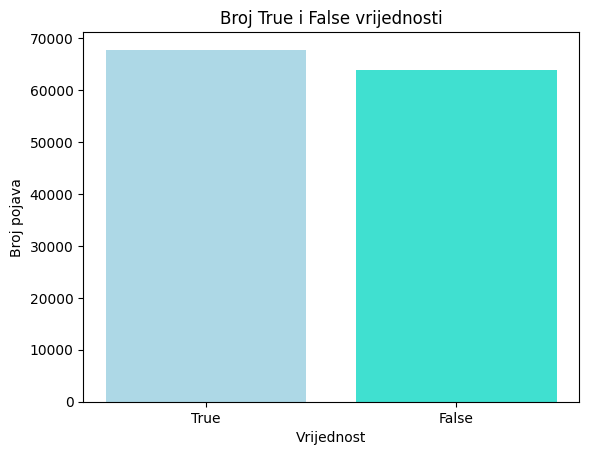

In [ ]:
counts = df['majority_target'].value_counts()


plt.bar(counts.index.astype(str), counts.values, color=['lightblue', 'turquoise'])
plt.xlabel("Vrijednost")
plt.ylabel("Broj pojava")
plt.title("Broj True i False vrijednosti")
plt.show()

In [17]:
broj_true_vrijednosti = df[df['majority_target'] == True ].shape[0]
broj_true_vrijednosti

67754

In [18]:
broj_false_vrijednosti = df[df['majority_target'] == False ].shape[0]
broj_false_vrijednosti

63839

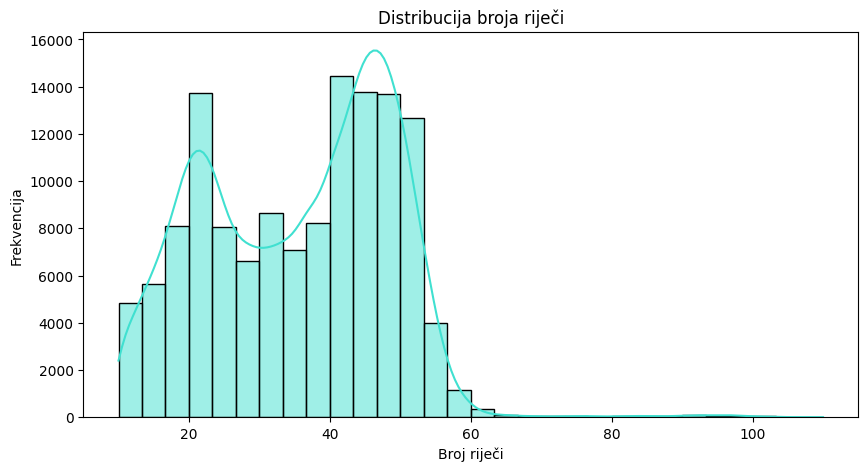

In [19]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Word count'], bins=30, kde=True, color='turquoise')

plt.xlabel("Broj riječi")
plt.ylabel("Frekvencija")
plt.title("Distribucija broja riječi")


plt.show()

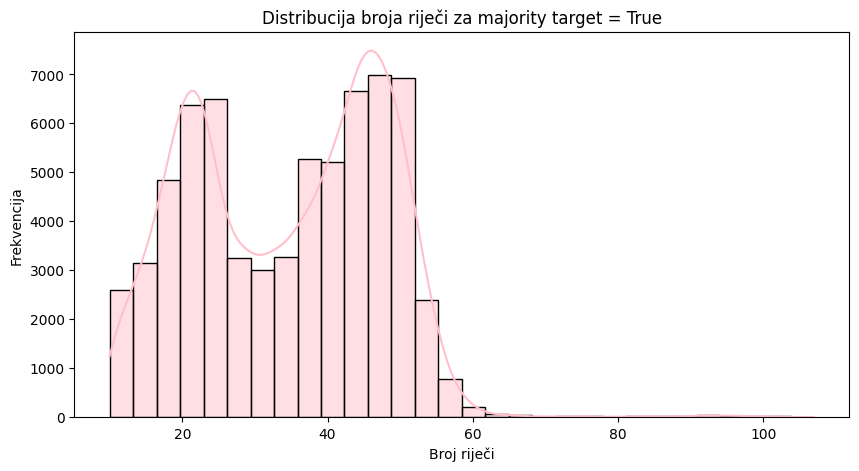

In [ ]:
df_true = df[df['majority_target'] == True]  

plt.figure(figsize=(10, 5))
sns.histplot(df_true['Word count'], bins=30, kde=True, color='pink')

plt.xlabel("Broj riječi")
plt.ylabel("Frekvencija")
plt.title("Distribucija broja riječi za majority target = True")

plt.show()

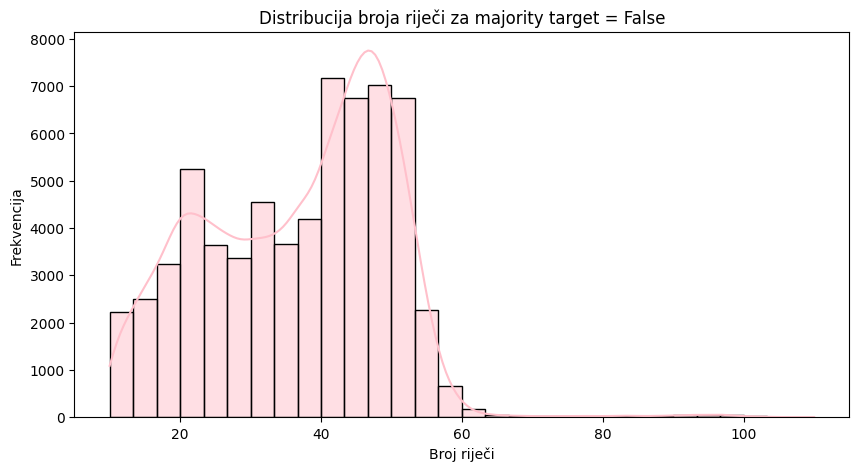

In [ ]:
df_false = df[df['majority_target'] == False]  

plt.figure(figsize=(10, 5))
sns.histplot(df_false['Word count'], bins=30, kde=True, color='pink')

plt.xlabel("Broj riječi")
plt.ylabel("Frekvencija")
plt.title("Distribucija broja riječi za majority target = False")

plt.show()

In [22]:
lexicon = Empath()


empath_scores= []


for i, tweet in enumerate(df['tweet']):
    try:
        empath_result = lexicon.analyze(tweet, normalize=True)
        empath_scores.append({'tweet': tweet, 'empath_result': empath_result})
    except Exception as e:
        print(f"An error occurred for tweet {i}: {e}")

df_empath_2 = pd.json_normalize(empath_scores)

In [23]:
df_empath_2.to_csv("df_empath_2.csv")

In [24]:
df = pd.read_csv("df_empath_2.csv")
df

,Unnamed: 0,tweet,empath_result.help,empath_result.office,empath_result.dance,empath_result.money,empath_result.wedding,empath_result.domestic_work,empath_result.sleep,empath_result.medical_emergency,...,empath_result.weapon,empath_result.children,empath_result.monster,empath_result.ocean,empath_result.giving,empath_result.contentment,empath_result.writing,empath_result.rural,empath_result.positive_emotion,empath_result.musical
0,0,@POTUS Biden Blunders - 6 Month Update\n\nInfl...,0.0,0.0,0.0,0.0,0.000000,0.025000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.025000,0.0,0.0,0.000000,0.000000,0.0
1,1,@S0SickRick @Stairmaster_ @6d6f636869 Not as m...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
2,2,THE SUPREME COURT is siding with super rich pr...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.028571,0.000000,0.0
3,3,@POTUS Biden Blunders\n\nBroken campaign promi...,0.0,0.0,0.0,0.0,0.000000,0.027027,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.027027,0.0,0.0,0.000000,0.000000,0.0
4,4,@OhComfy I agree. The confluence of events rig...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131588,131588,Joe Biden's family owned African slaves....\n\...,0.0,0.0,0.0,0.0,0.040000,0.040000,0.0,0.0,...,0.0,0.040000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.040000,0.0
131589,131589,"Joe Bidens great, great grandfather was a slav...",0.0,0.0,0.0,0.0,0.071429,0.071429,0.0,0.0,...,0.0,0.142857,0.0,0.0,0.000000,0.0,0.0,0.000000,0.142857,0.0
131590,131590,"@ChevyChaseToGo ""Joe Bidens great-grandfather ...",0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0
131591,131591,@JoeBiden Facts are Bidens VP Kamala Harris Gr...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0


In [27]:
df_empath_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131593 entries, 0 to 131592
Columns: 195 entries, tweet to empath_result.musical
dtypes: float64(194), object(1)
memory usage: 195.8+ MB


In [31]:
zero_columns = df_empath_2.columns[df_empath_2.eq(0.0).all(axis=0)]
zero_columns


Index([], dtype='object')

In [32]:
df_empath_2.columns

Index(['tweet', 'empath_result.help', 'empath_result.office',
       'empath_result.dance', 'empath_result.money', 'empath_result.wedding',
       'empath_result.domestic_work', 'empath_result.sleep',
       'empath_result.medical_emergency', 'empath_result.cold',
       ...
       'empath_result.weapon', 'empath_result.children',
       'empath_result.monster', 'empath_result.ocean', 'empath_result.giving',
       'empath_result.contentment', 'empath_result.writing',
       'empath_result.rural', 'empath_result.positive_emotion',
       'empath_result.musical'],
      dtype='object', length=195)